Лаб №4 по Теории Принятия Решений

In [172]:
import numpy as np

In [173]:
import pandas as pd # Для красивого вывода.

In [174]:
from numpy import cbrt

In [175]:
import math

Запрашиваем число альтернатив и критериев

In [176]:
numAlt = 3#@param
numCrit = 3 #@param

In [177]:
arrEx = np.ones((numCrit, numCrit))
arrEx

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [178]:
arrCrit = list()
for c in range(0, numCrit):
  arrCrit.append(np.ones((numAlt, numAlt)))
arrCrit

[array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])]

Получился список из numCrit массивов размером (numAlt x numAlt)

In [179]:
for i in range(0, numCrit):
    for j in range(i+1, numCrit):
      print(f"Как {i+1} относится к {j+1}?")
      relation = np.float32(input())
      arrEx[i, j] = relation
      arrEx[j, i] = 1/relation


Как 1 относится к 2?
2
Как 1 относится к 3?
3
Как 2 относится к 3?
0.166666666666


Матрица экспертных оценок критериев:

In [180]:
pd.DataFrame(arrEx, index=range(1, numAlt+1), columns=range(1, numAlt+1))

,1,2,3
1,1.000000,2.0,3.000000
2,0.500000,1.0,0.166667
3,0.333333,6.0,1.000000


In [181]:
for k in range(0, numCrit):
  print(f"Критерий {k+1}\n")
  for i in range(0, numAlt):
    for j in range(i+1, numAlt):
      print(f"Как {i+1} относится к {j+1}?")
      relation = np.float32(input())
      arrCrit[k][i, j] = relation
      arrCrit[k][j, i] = 1/relation
  print("\n")


Критерий 1

Как 1 относится к 2?
1
Как 1 относится к 3?
0.5
Как 2 относится к 3?
3


Критерий 2

Как 1 относится к 2?
5
Как 1 относится к 3?
4
Как 2 относится к 3?
8


Критерий 3

Как 1 относится к 2?
4
Как 1 относится к 3?
2
Как 2 относится к 3?
3




Матрицы оценок альтернатив по критериям

In [182]:
for k in range(0, numCrit):
  print(f"Критерий {k+1}\n")
  print(pd.DataFrame(arrCrit[k], index=range(1, numAlt+1), columns=range(1, numAlt+1)))
  print("\n")

Критерий 1

     1         2    3
1  1.0  1.000000  0.5
2  1.0  1.000000  3.0
3  2.0  0.333333  1.0


Критерий 2

      1      2    3
1  1.00  5.000  4.0
2  0.20  1.000  8.0
3  0.25  0.125  1.0


Критерий 3

      1         2    3
1  1.00  4.000000  2.0
2  0.25  1.000000  3.0
3  0.50  0.333333  1.0




In [183]:
def changeMatrix(array: np.array):
  new = 0
  conf = ""
  for i in range(0, len(array)):
    for j in range(i+1, len(array)):
      print(f"Изменить отношение {i+1} на {j+1}?")
      conf = input()
      if conf[0] == "y" or conf[0] == "д":
        new = input()
        array[i, j] = float(new)
        array[j, i] = 1./float(new)
        return


Расчёт относительных весов критериев

In [192]:
w0 = arrEx.prod(axis=1)
w0 = cbrt(w0)
w0 = w0 / w0.sum()

In [193]:
pd.Series(w0, index=range(1, numCrit+1))

1    0.539615
2    0.296961
3    0.163424
dtype: float64

Суммы столбцов

In [194]:
s0=arrEx.sum(axis=0)
pd.Series(s0, index=range(1, numCrit+1))

1    1.833333
2    3.500000
3    6.000000
dtype: float64

Расчёт максимального собственного значения (приближённого)

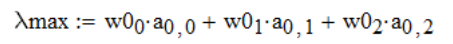

In [195]:
eigenmax0 = (w0*s0).sum()
eigenmax0

3.009202712714279

In [196]:
n = math.floor(eigenmax0)
n

3

Расчёт критерия качества матрицы экспертных точек

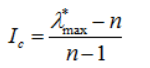

In [197]:
quality0 = (eigenmax0 - n) / (n - 1)
quality0

0.00460135635713943

In [198]:
if quality0 > 0.2:
  print("Показатель больше 20%")
  changeMatrix(arrEx)
  print(pd.DataFrame(arrEx, index=range(0, numCrit), columns=range(0, numCrit)))
  print("\n\n\nне забудьте заново рассчитать параметры для этой матрицы.")
else:
  print("Показатель меньше 20%")

Показатель меньше 20%


Расчёт относительных весов альтернатив по критериям

In [210]:
wCrit = list()
for k in range(0, numCrit):
  wCrit.append(arrCrit[k].prod(axis=1))
  wCrit[k] = cbrt(wCrit[k])
  wCrit[k] = wCrit[k] / wCrit[k].sum()

In [211]:
for k in range(0, numCrit):
  print(f"Критерий {k+1}\n")
  print(pd.Series(wCrit[k], index=range(1, numAlt+1)))
  print("\n")

Критерий 1

1    0.255248
2    0.463816
3    0.280936
dtype: float64


Критерий 2

1    0.679515
2    0.211141
3    0.109344
dtype: float64


Критерий 3

1    0.578222
2    0.262675
3    0.159104
dtype: float64




Суммы столбцов

In [212]:
sCrit = list()
for k in range(0, numCrit):
  sCrit.append(arrCrit[k].sum(axis=0))
  print(f"Критерий {k+1}\n")
  print(pd.Series(sCrit[k], index=range(1, numCrit+1)))
  print("\n")

Критерий 1

1    4.000000
2    2.333333
3    4.500000
dtype: float64


Критерий 2

1    1.450000
2    6.333333
3    8.000000
dtype: float64


Критерий 3

1    1.750000
2    5.333333
3    6.000000
dtype: float64




Расчёт максимальных собственных значений (приближённых)

In [213]:
eigenCrit = list()
for k in range(0, numCrit):
  eigenCrit.append((wCrit[k]*sCrit[k]).sum())
  print(f"Критерий {k+1}\n{eigenCrit[k]}\n\n")

Критерий 1
3.367441800981245


Критерий 2
3.197275842714016


Критерий 3
3.367441800981244




Расчёт критериев качества матрицы экспертных точек

In [214]:
qualCrit = list()

for k in range(0, numCrit):
  qualCrit.append((eigenCrit[k] - n) / (n - 1))
  print(f"Критерий {k+1}\n{qualCrit[k]}")
  if qualCrit[k] > 0.2:
    print("Показатель больше 20%")
    changeMatrix(arrCrit[k])
    print(pd.DataFrame(arrCrit[k], index=range(0, numAlt), columns=range(0, numAlt)))
    print("\n\nне забудьте заново рассчитать параметры для этой матрицы.\n\n")
  else:
    print("Показатель меньше 20%\n")

Критерий 1
0.1837209004906224
Показатель меньше 20%

Критерий 2
0.09863792135700811
Показатель меньше 20%

Критерий 3
0.18372090049062195
Показатель меньше 20%



Расчет относительных весов кандидатов методом линейной
свертки.


In [215]:
finWeight = list()
for k in range(0, numCrit):
  finWeight.append((w0*wCrit[k]).sum())
  print(f"Альтернатива {k+1}\n{finWeight[k]}\n\n")

Альтернатива 1
0.3213825374960591


Альтернатива 2
0.4472462993129026


Альтернатива 3
0.4160223852779146




Выбираем оптимальную альтернативу

In [216]:
print(f"Оптимальное решение: {pd.Series(finWeight).idxmax() + 1}")

Оптимальное решение: 2
